In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
def moebius(x):
  count = 1
  if(x == 1):
    return 1
  else:
    for i in range(x, 1, -1):
      if(x % i == 0):
        if((x / i) % i == 0):
          return 0
        else:
          is_simple = True
          for j in range(i-1, 1, -1):
            if (i % j == 0):
              is_simple = False
              break
          if (is_simple):
            count *= -1
  return count


def allDiv(x):
  a = np.array([1])
  for i in range(x, 1, -1):
    if (x % i == 0):
      a = np.append(a, i)
  return a

def T(p = 2, n = 3):
  arrd = allDiv(n)
  tnum = np.poly1d([1])
  tden = np.poly1d([1])
  for d in arrd:
    mu = moebius(d)
    if(mu != 0):
      deg = int(p**(n/d))
      xd = np.full(deg + 1, 0)
      xd[deg-1] = -1
      xd[0] = 1
      polyd = np.poly1d(xd)
      if(mu < 0):
        for i in range(-mu):
          tden = np.polymul(tden, polyd)
      elif(mu > 0):
        for i in range(mu):
          tnum = np.polymul(tnum, polyd)
  t, r = np.polydiv(tnum, tden)
  return t

In [ ]:
def rNotClear(r):
  for i in r:
    if(i % 2 == 1):
      return True
  return False

def nextPoly(f, n, p):
  fib = 0
  for i in f:
    fib = fib*10 + i
  fsb = str(int(fib))
  fi = int(fsb, p) + 1
  fsb = ""
  while fi > 0:
      fsb = str(fi % p) + fsb
      fi = fi // p
  fa2 = np.array([])
  for i in fsb:
    fa2 = np.append(fa2, int(i))
  f2 = np.poly1d(fa2)
  if(fa2[n] != 1):
    f2 = nextPoly(f2, n, p)
  return f2



def searchFirst(p = 2, n = 3):
  t = T(p, n)
  fa = np.full(n+1, 0)
  fa[n] = 1
  fa[0] = 1
  f = np.poly1d(fa)
  q, r = np.polydiv(t, f)
  while(rNotClear(r)):
    f = nextPoly(f, n, p)
    q, r = np.polydiv(t, f)
  return f

   2
1 x + 1
Вычисление для p = 5 и n = 2 заняло 0.0040 секунд
   3
1 x + 2 x + 1
Вычисление для p = 5 и n = 3 заняло 0.0229 секунд
   4
1 x + 1
Вычисление для p = 5 и n = 4 заняло 0.0530 секунд
   5
1 x + 1 x + 1
Вычисление для p = 5 и n = 5 заняло 0.4202 секунд


/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:1033: RuntimeWarning: overflow encountered in subtract
  r[k:k+n+1] -= d*v
/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:1033: RuntimeWarning: invalid value encountered in multiply
  r[k:k+n+1] -= d*v
/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:1033: RuntimeWarning: invalid value encountered in subtract
  r[k:k+n+1] -= d*v
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


   6
1 x + 1 x + 1
Вычисление для p = 5 и n = 6 заняло 1.7082 секунд
   7
1 x + 1 x + 1
Вычисление для p = 5 и n = 7 заняло 7.3684 секунд
   8
1 x + 1
Вычисление для p = 5 и n = 8 заняло 34.2112 секунд
   9
1 x + 1 x + 1
Вычисление для p = 5 и n = 9 заняло 180.6970 секунд
   10
1 x  + 1 x + 1
Вычисление для p = 5 и n = 10 заняло 918.0367 секунд


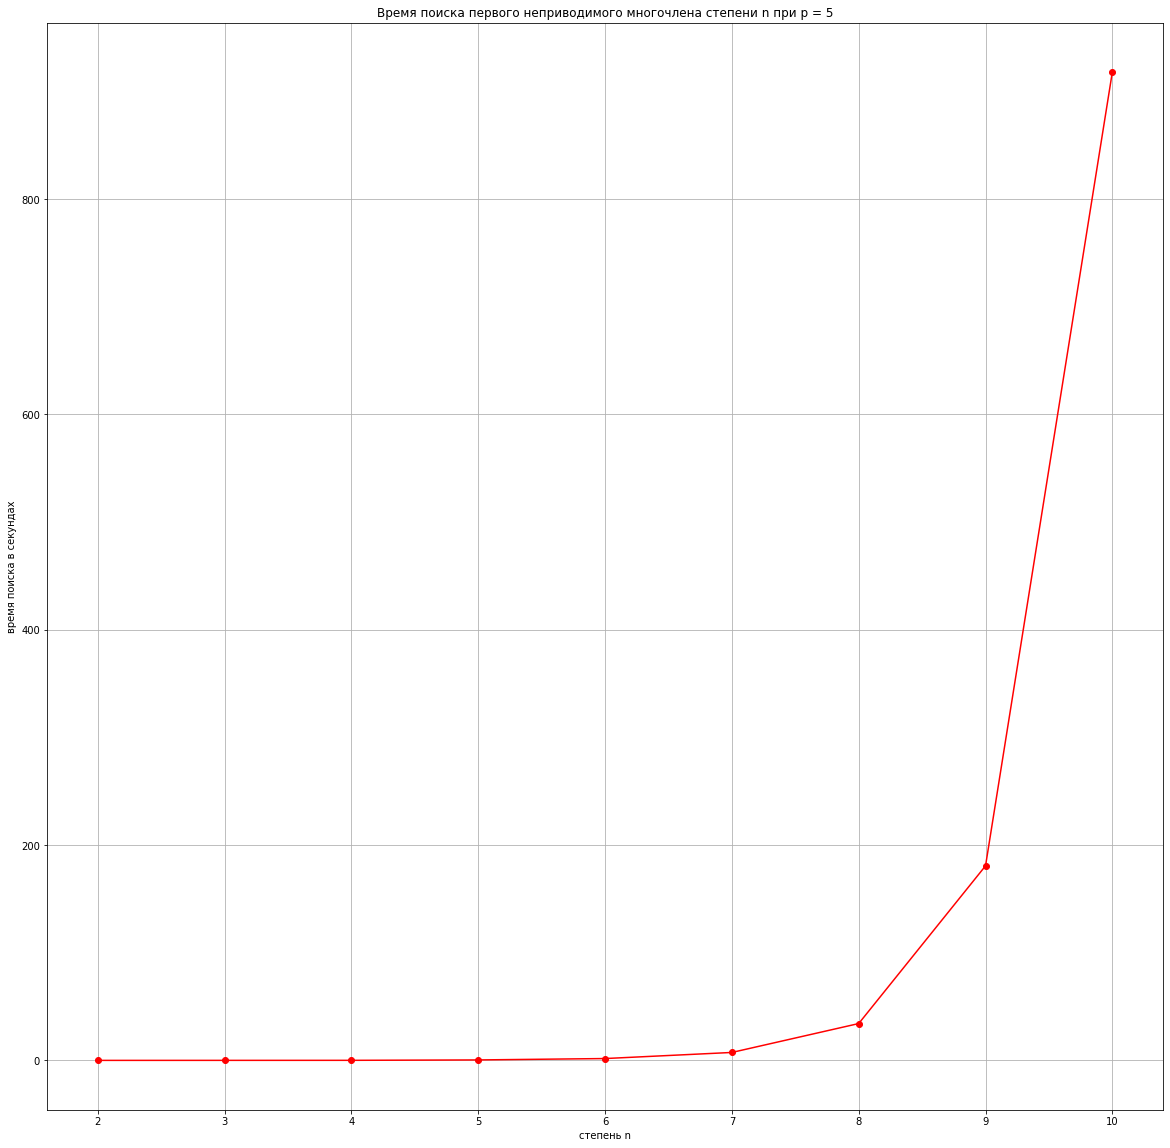

[0.003973423999923398, 0.022934962999897834, 0.053046846999677655, 0.4202006449995679, 1.7081958919998215, 7.368375783000374, 34.2112008819995, 180.69699249400037, 918.0366988079995]


In [ ]:

pa = [5]
for p in pa:
  na = []
  timea = []
  for n in range(2, 11):
    tic = time.perf_counter()
    print(searchFirst(p, n))
    toc = time.perf_counter()
    print(f"Вычисление для p = {p} и n = {n} заняло {toc - tic:0.4f} секунд")
    na.append(n)
    timea.append(toc - tic)
  plt.figure(figsize=(20,20))
  plt.plot(na, timea, "ro-")
  plt.title(f"Время поиска первого неприводимого многочлена степени n при p = {p}")
  plt.xlabel("степень n")
  plt.ylabel("время поиска в секундах")
  plt.grid()
  plt.show()
  print(timea)
  np.save(f'n_p{p}', na)
  np.save(f'time_p{p}', timea)